In [65]:
import numpy as np
import pandas as pd
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.metrics import silhouette_score
import config
import spotipy
from bs4 import BeautifulSoup
import requests
import random
import difflib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
import colorama
from colorama import Fore

In [2]:
df = pd.read_csv("/Users/irenewalken/Documents/GitHub/Song-recommender/spotify_db.csv")
df

,Unnamed: 0,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0,0.557,0.442,-7.224,0.0243,0.73100,0.000015,0.1100,0.2130,146.277,75JFxkI2RXiU7L9VXzMkle,309600
1,1,0.612,0.280,-8.648,0.0434,0.93200,0.000000,0.0880,0.3870,72.795,0nJW01T7XtvILxQgC5J7Wh,213827
2,2,0.369,0.272,-10.497,0.0364,0.86600,0.000000,0.1470,0.2180,172.929,5JCoSi02qi3jJeHdZXMmR8,152667
3,3,0.567,0.267,-6.502,0.0299,0.83900,0.000001,0.0890,0.0592,110.011,1ZMiCix7XSAbfAJlEZWMCp,240133
4,4,0.652,0.557,-5.714,0.0318,0.74000,0.000000,0.1240,0.4830,150.073,2qxmye6gAegTMjLKEBoR3d,169354
...,...,...,...,...,...,...,...,...,...,...,...,...
15286,486,0.567,0.893,-6.493,0.2100,0.38200,0.000001,0.3800,0.9640,93.668,6s3F6h5gPAds0QvtBsoRpR,176707
15287,487,0.729,0.936,-7.536,0.0776,0.01290,0.000892,0.0367,0.5980,131.986,06hsdMbBxWGqBO0TV0Zrkf,194000
15288,488,0.591,0.986,-5.249,0.0500,0.00549,0.000190,0.1890,0.5450,134.999,6BIif1TGEGKRuiz6lWmZO9,217400
15289,489,0.754,0.758,-9.363,0.0384,0.04980,0.000118,0.3730,0.5080,125.917,0bQrVSPT7yQZXyQ6s6Ldqx,264027


In [3]:
df = df.drop(labels='Unnamed: 0', axis=1)
df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.557,0.442,-7.224,0.0243,0.73100,0.000015,0.1100,0.2130,146.277,75JFxkI2RXiU7L9VXzMkle,309600
1,0.612,0.280,-8.648,0.0434,0.93200,0.000000,0.0880,0.3870,72.795,0nJW01T7XtvILxQgC5J7Wh,213827
2,0.369,0.272,-10.497,0.0364,0.86600,0.000000,0.1470,0.2180,172.929,5JCoSi02qi3jJeHdZXMmR8,152667
3,0.567,0.267,-6.502,0.0299,0.83900,0.000001,0.0890,0.0592,110.011,1ZMiCix7XSAbfAJlEZWMCp,240133
4,0.652,0.557,-5.714,0.0318,0.74000,0.000000,0.1240,0.4830,150.073,2qxmye6gAegTMjLKEBoR3d,169354
...,...,...,...,...,...,...,...,...,...,...,...
15286,0.567,0.893,-6.493,0.2100,0.38200,0.000001,0.3800,0.9640,93.668,6s3F6h5gPAds0QvtBsoRpR,176707
15287,0.729,0.936,-7.536,0.0776,0.01290,0.000892,0.0367,0.5980,131.986,06hsdMbBxWGqBO0TV0Zrkf,194000
15288,0.591,0.986,-5.249,0.0500,0.00549,0.000190,0.1890,0.5450,134.999,6BIif1TGEGKRuiz6lWmZO9,217400
15289,0.754,0.758,-9.363,0.0384,0.04980,0.000118,0.3730,0.5080,125.917,0bQrVSPT7yQZXyQ6s6Ldqx,264027


In [4]:
X=df._get_numeric_data()
X

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.557,0.442,-7.224,0.0243,0.73100,0.000015,0.1100,0.2130,146.277,309600
1,0.612,0.280,-8.648,0.0434,0.93200,0.000000,0.0880,0.3870,72.795,213827
2,0.369,0.272,-10.497,0.0364,0.86600,0.000000,0.1470,0.2180,172.929,152667
3,0.567,0.267,-6.502,0.0299,0.83900,0.000001,0.0890,0.0592,110.011,240133
4,0.652,0.557,-5.714,0.0318,0.74000,0.000000,0.1240,0.4830,150.073,169354
...,...,...,...,...,...,...,...,...,...,...
15286,0.567,0.893,-6.493,0.2100,0.38200,0.000001,0.3800,0.9640,93.668,176707
15287,0.729,0.936,-7.536,0.0776,0.01290,0.000892,0.0367,0.5980,131.986,194000
15288,0.591,0.986,-5.249,0.0500,0.00549,0.000190,0.1890,0.5450,134.999,217400
15289,0.754,0.758,-9.363,0.0384,0.04980,0.000118,0.3730,0.5080,125.917,264027


In [30]:
X = df[["danceability","loudness","energy","speechiness","acousticness","instrumentalness","liveness","valence","tempo"]]
X

,danceability,loudness,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.557,-7.224,0.442,0.0243,0.73100,0.000015,0.1100,0.2130,146.277
1,0.612,-8.648,0.280,0.0434,0.93200,0.000000,0.0880,0.3870,72.795
2,0.369,-10.497,0.272,0.0364,0.86600,0.000000,0.1470,0.2180,172.929
3,0.567,-6.502,0.267,0.0299,0.83900,0.000001,0.0890,0.0592,110.011
4,0.652,-5.714,0.557,0.0318,0.74000,0.000000,0.1240,0.4830,150.073
...,...,...,...,...,...,...,...,...,...
15286,0.567,-6.493,0.893,0.2100,0.38200,0.000001,0.3800,0.9640,93.668
15287,0.729,-7.536,0.936,0.0776,0.01290,0.000892,0.0367,0.5980,131.986
15288,0.591,-5.249,0.986,0.0500,0.00549,0.000190,0.1890,0.5450,134.999
15289,0.754,-9.363,0.758,0.0384,0.04980,0.000118,0.3730,0.5080,125.917


## Scaling features

In [6]:
X.describe()

,danceability,loudness,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,15291.000000,15291.000000,15291.000000,15291.000000,15291.000000,15291.000000,15291.000000,15291.000000,15291.000000
mean,0.583631,-8.688571,0.670458,0.075989,0.248322,0.217893,0.181360,0.464314,123.507531
std,0.171897,6.015255,0.262961,0.074998,0.319776,0.358539,0.151937,0.269396,28.222291
min,0.000000,-46.847000,0.001050,0.000000,0.000000,0.000000,0.012300,0.000000,0.000000
25%,0.476000,-9.805500,0.530000,0.037400,0.007260,0.000000,0.093900,0.233000,101.294500
50%,0.605000,-7.119000,0.733000,0.049400,0.083900,0.000155,0.119000,0.448000,125.556000
75%,0.713000,-5.149500,0.879000,0.077300,0.399000,0.390000,0.219000,0.683000,140.047000
max,0.980000,0.165000,1.000000,0.911000,0.996000,0.989000,0.994000,0.993000,217.913000



**K-Means is a distance based algorithm**: we need to scale / normalize!:

In [7]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
display(X.head())
print()
display(X_scaled_df.head())

,danceability,loudness,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.557,-7.224,0.442,0.0243,0.731,0.000015,0.110,0.2130,146.277
1,0.612,-8.648,0.280,0.0434,0.932,0.000000,0.088,0.3870,72.795
2,0.369,-10.497,0.272,0.0364,0.866,0.000000,0.147,0.2180,172.929
3,0.567,-6.502,0.267,0.0299,0.839,0.000001,0.089,0.0592,110.011
4,0.652,-5.714,0.557,0.0318,0.740,0.000000,0.124,0.4830,150.073


,danceability,loudness,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,-0.154932,0.243484,-0.868821,-0.689234,1.509475,-0.607704,-0.469684,-0.932911,0.806817
1,0.165038,0.006745,-1.484902,-0.434551,2.138060,-0.607745,-0.614485,-0.287001,-1.796955
2,-1.248644,-0.300650,-1.515326,-0.527891,1.931659,-0.607745,-0.226155,-0.914350,1.751207
3,-0.096755,0.363516,-1.534341,-0.614563,1.847222,-0.607741,-0.607904,-1.503836,-0.478238
4,0.397742,0.494521,-0.431479,-0.589228,1.537621,-0.607745,-0.377538,0.069363,0.941325


In [8]:
X_scaled_df.describe()

,danceability,loudness,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,1.529100e+04,1.529100e+04,1.529100e+04,1.529100e+04,1.529100e+04,1.529100e+04,1.529100e+04,1.529100e+04,1.529100e+04
mean,-4.628289e-16,-4.731535e-16,3.671773e-16,1.357919e-16,2.913110e-16,-1.156183e-16,-2.261251e-16,9.960133e-17,2.134299e-16
std,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00
min,-3.395346e+00,-6.343817e+00,-2.545740e+00,-1.013255e+00,-7.765739e-01,-6.077449e-01,-1.112733e+00,-1.723594e+00,-4.376384e+00
25%,-6.261588e-01,-1.856888e-01,-5.341593e-01,-5.145564e-01,-7.538698e-01,-6.077449e-01,-5.756524e-01,-8.586686e-01,-7.870997e-01
50%,1.243142e-01,2.609403e-01,2.378436e-01,-3.545462e-01,-5.141943e-01,-6.073126e-01,-4.104475e-01,-6.056132e-02,7.258576e-02
75%,7.526171e-01,5.883686e-01,7.930773e-01,1.747745e-02,4.712148e-01,4.800373e-01,2.477396e-01,8.117885e-01,5.860619e-01
max,2.305922e+00,1.471901e+00,1.253237e+00,1.113418e+01,2.338207e+00,2.150759e+00,5.348690e+00,1.962548e+00,3.345177e+00


Now, all features will have the same weight.

## Clustering the songs with K-Means

In [31]:
kmeans = KMeans(n_clusters=8, random_state=1234)
kmeans.fit(X_scaled_df)

KMeans(random_state=1234)

In [32]:
kmeans.labels_

array([4, 4, 4, ..., 3, 6, 5], dtype=int32)

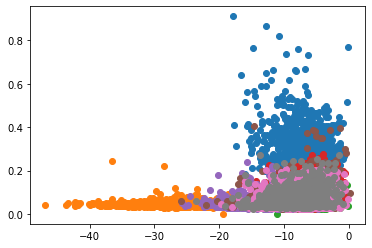

In [11]:
# assign a cluster to each example
labels = kmeans.predict(X_scaled_df)
# retrieve unique clusters
clusters = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    pyplot.scatter(X.to_numpy()[row_ix, 1], X.to_numpy()[row_ix, 3])
    # show the plot
pyplot.show()

In [12]:
clusters = kmeans.predict(X_scaled_df)
#clusters
pd.Series(clusters).value_counts().sort_index()

0     915
1    1071
2    2765
3    2025
4    1766
5     769
6    3578
7    2402
dtype: int64

In [13]:
#X_df = pd.DataFrame(X)
X["cluster"] = clusters
X

/var/folders/dc/mkf8yrbx1ds4p7h5pty0xs600000gn/T/ipykernel_1661/3390344749.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["cluster"] = clusters


,danceability,loudness,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
0,0.557,-7.224,0.442,0.0243,0.73100,0.000015,0.1100,0.2130,146.277,4
1,0.612,-8.648,0.280,0.0434,0.93200,0.000000,0.0880,0.3870,72.795,4
2,0.369,-10.497,0.272,0.0364,0.86600,0.000000,0.1470,0.2180,172.929,4
3,0.567,-6.502,0.267,0.0299,0.83900,0.000001,0.0890,0.0592,110.011,4
4,0.652,-5.714,0.557,0.0318,0.74000,0.000000,0.1240,0.4830,150.073,4
...,...,...,...,...,...,...,...,...,...,...
15286,0.567,-6.493,0.893,0.2100,0.38200,0.000001,0.3800,0.9640,93.668,6
15287,0.729,-7.536,0.936,0.0776,0.01290,0.000892,0.0367,0.5980,131.986,6
15288,0.591,-5.249,0.986,0.0500,0.00549,0.000190,0.1890,0.5450,134.999,3
15289,0.754,-9.363,0.758,0.0384,0.04980,0.000118,0.3730,0.5080,125.917,6


In [14]:
X[X['cluster'] == 4].sample()

,danceability,loudness,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
7090,0.661,-9.104,0.44,0.0803,0.457,0.0,0.128,0.352,149.937,4


## Playing with the parameters

In [15]:
kmeans.inertia_

51246.55474068437

In [16]:
kmeans2 = KMeans(n_clusters=8,
                init="k-means++",
                n_init=50,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=1,
                tol=0,
                algorithm="elkan",
                random_state=1234)
kmeans2.fit(X_scaled_df)
print(kmeans2.inertia_)

54037.32318346553


## Chosing K

Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 

Training a K-Means model with 20 clusters! 



Text(0.5, 1.0, 'Elbow Method showing the optimal k')

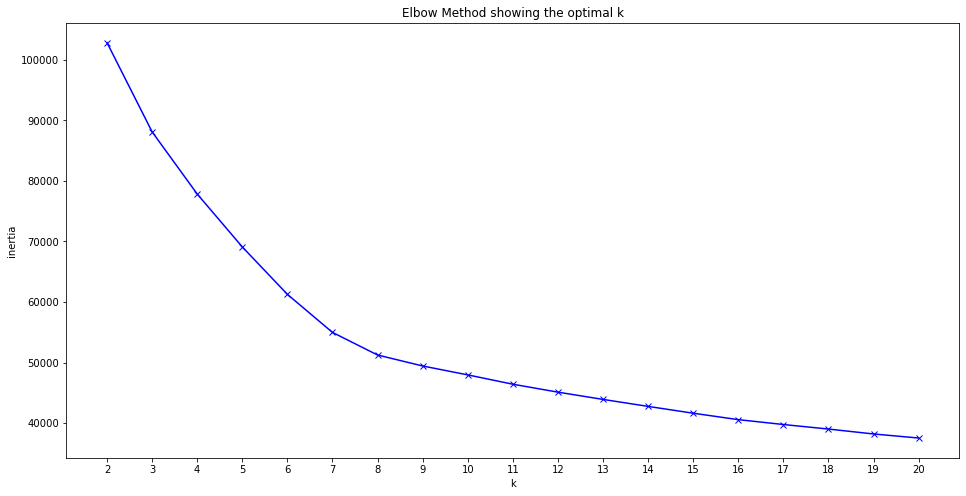

In [17]:
K = range(2, 21)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

## Silouhette

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

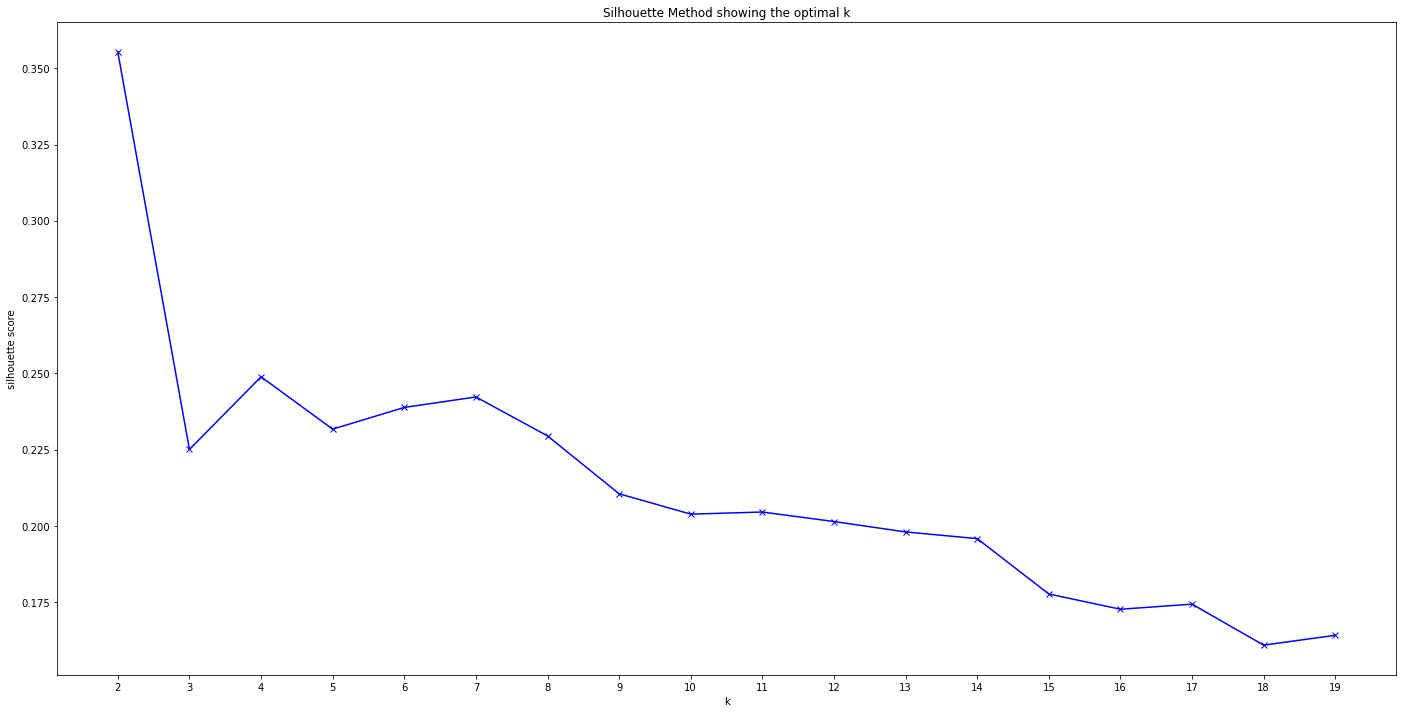

In [18]:
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)
    
    filename = "Model/kmeans_" + str(k) + ".pickle"
    with open(filename, "wb") as f:
        pickle.dump(kmeans,f)
    
    silhouette.append(silhouette_score(X_scaled_df, kmeans.predict(X_scaled_df)))


plt.figure(figsize=(24,12))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

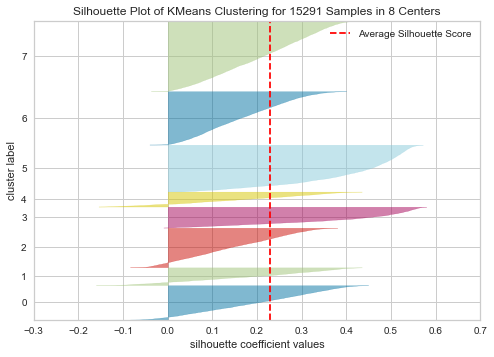

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 15291 Samples in 8 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [19]:
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(8, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X_scaled_df)        # Fit the data to the visualizer
visualizer.show()  

## Saving with pickle

In [20]:
import pickle

#scaler = StandardScaler()
#model = KMeans()

with open("/Users/irenewalken/Documents/GitHub/Song-recommender/scaler.pickle", "wb") as f:
    pickle.dump(scaler,f)

with open("/Users/irenewalken/Documents/GitHub/Song-recommender/kmeans_4.pickle", "wb") as f:
    pickle.dump(kmeans,f)

In [21]:
def load(filename = "filename.pickle"): 
    try: 
        with open(filename, "rb") as f: 
            return pickle.load(f) 
        
    except FileNotFoundError: 
        print("File not found!") 



In [22]:
scaler2 = load("/Users/irenewalken/Documents/GitHub/Song-recommender/scaler.pickle")
scaler2

StandardScaler()

## SONG RECOMMENDER

In [134]:
def song_recommender():
    df = pd.read_csv("/Users/irenewalken/Documents/GitHub/Song-recommender/spotify_db.csv")
    df = df.drop(labels='Unnamed: 0', axis=1)
    X = df[["danceability","energy","loudness","speechiness","acousticness","instrumentalness","liveness","valence","tempo"]]
    
    scaler = StandardScaler()
    scaler.fit(X)
    X_scaled = scaler.transform(X)
    X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
   
    
    kmeans = KMeans(n_clusters=8, random_state=1234)
    kmeans.fit(X_scaled_df)
    
    
    
    clusters = kmeans.predict(X_scaled_df)
    #clusters
    pd.Series(clusters).value_counts().sort_index()
    
    
    song_name = str(input("Pic your song: "))
    import spotipy
    import json
    from spotipy.oauth2 import SpotifyClientCredentials



    sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= config.client_id,
                                                               client_secret= config.client_secret))

    results = sp.search(q=song_name,limit=10,market="GB")
    track_id=track_id=results["tracks"]["items"][0]["id"]
    for item in results['tracks']['items']:
        print("The name of song is:", Fore.RED +'\033[1m' + item['name'] + '\033[0m')  
              #and the id is: {}",item["id"]))
        
    print()
    song_name1 = str(input("Which song do you mean? "))
    print()
    results = sp.search(q=song_name1,limit=1,market="GB")
    track_id=track_id=results["tracks"]["items"][0]["id"]
    for item in results['tracks']['items']:
        print("You picked song: ", Fore.RED +'\033[1m' + item['name'] + '\033[0m') 
    
    from IPython.display import IFrame

    display(IFrame(src="https://open.spotify.com/embed/track/"+track_id,
           width="320",
           height="80",
           frameborder="0",
           allowtransparency="true",
           allow="encrypted-media",
          ))
    
    list_of_songs=[]
    for index in range(0,len(results["tracks"]["items"])):
        list_of_songs.append(sp.audio_features(results["tracks"]["items"][index]["uri"])[0])
    df_new=pd.DataFrame(list_of_songs)    
    df_new=df_new[["danceability","energy","loudness","speechiness","acousticness",
        "instrumentalness","liveness","valence","tempo","id","duration_ms"]]

    X_new = df_new[["danceability","energy","loudness","speechiness","acousticness","instrumentalness","liveness","valence","tempo"]]
    scaler3 = StandardScaler()
    scaler.fit(X)
    X_new_scaled = scaler.transform(X_new)
    X_new_scaled_df = pd.DataFrame(X_new_scaled, columns = X_new.columns)
    
    print(Fore.RED +'\033[1m'+"Our recommendations for you: "+ '\033[0m')
    
    
    X["cluster"] = clusters
    
    X = X.join(df["id"])
    
    #Prediction
    predict_cluster = kmeans.predict(X_new_scaled_df)
    print()
    
    
    random_song=X[X["cluster"] == predict_cluster[0]].sample()
    random_song2=X[X["cluster"] == predict_cluster[0]].sample()
    random_song3=X[X["cluster"] == predict_cluster[0]].sample()
    
    
    song = random_song["id"].tolist()
    song2 = random_song2["id"].tolist()
    song3 = random_song3["id"].tolist()
    
    
    from IPython.display import IFrame

    display(IFrame(src="https://open.spotify.com/embed/track/"+song[0],
           width="320",
           height="80",
           frameborder="0",
           allowtransparency="true",
           allow="encrypted-media",
          ))
    
    
    display(IFrame(src="https://open.spotify.com/embed/track/"+song2[0],
           width="320",
           height="80",
           frameborder="0",
           allowtransparency="true",
           allow="encrypted-media",
          ))
   
    
    display(IFrame(src="https://open.spotify.com/embed/track/"+song3[0],
           width="320",
           height="80",
           frameborder="0",
           allowtransparency="true",
           allow="encrypted-media",
          ))

In [135]:
song_recommender()


Pic your song: hi
The name of song is: HISTORY
The name of song is: Running Up That Hill (A Deal With God)
The name of song is: Hips Don't Lie (feat. Wyclef Jean)
The name of song is: Hit 'Em Up - Single Version
The name of song is: Highway to Hell
The name of song is: Why'd You Only Call Me When You're High?
The name of song is: The Hills
The name of song is: Him & I (with Halsey)
The name of song is: High Hopes
The name of song is: Ain't No Mountain High Enough

Which song do you mean? Hit 'Em Up - Single Version

You picked song:  Hit 'Em Up - Single Version


Our recommendations for you: 



/var/folders/dc/mkf8yrbx1ds4p7h5pty0xs600000gn/T/ipykernel_1661/374078270.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["cluster"] = clusters


## Shit experiments

In [37]:
billboard = pd.read_csv("/Users/irenewalken/Documents/GitHub/Ironhack_Labs/Spotify_web_scraped.csv")
billboard = billboard.drop(labels='Unnamed: 0', axis=1)
billboard

,singers,songs
0,Harry Styles,as it was
1,Steve Lacy,bad habit
2,Harry Styles,late night talking
3,Nicky Youre & dazy,sunroof
4,Lizzo,about damn time
...,...,...
95,Morgan Wallen,thought you should know
96,Luke Bryan,country on
97,Steve Lacy,static
98,Armani White,billie eilish.


In [112]:
difflib.get_close_matches(song_name_hot, billboard['songs'])

['as it was', 'last last', 'heat waves']

In [113]:
def random_music_func(x):
    choosen = random.choice(billboard['songs'].values)
    return choosen

In [117]:
song_name_hot = input()
if song_name_hot in billboard['songs'].values:
        print(song_name_hot.upper() +" is in the Bilboard hot list")
        print("Nice choice, we recommend you to try another song: "+random_music_func(song_name_hot))
elif difflib.get_close_matches(song_name_hot, billboard['songs']):
        print("Do try to find ", difflib.get_close_matches(song_name_hot, billboard['songs'])[0]+ " ?")
        song_name2 = input()
        if song_name2 == "yes":
            print (item["id"])
            print("Nice choice, we recommend you to try another song: "+random_music_func(song_name_hot).upper())
            
        elif song_name2 == "no":
            print("Unfortunately, the song is not in the hot list!")
            
        else:
            print("Unfortunately, the song is not in the hot list!")
             
else:
    print("Unfortunately, the song is not in the hot list!")

as it 
Do try to find  as it was ?
yes
4PPJCXPuBKPiIKOCuyGYZ4
Nice choice, we recommend you to try another song: DETOX


In [116]:
df_billboard_top_100[df_billboard_top_100["id"]== "4LRPiXqCikLlN15c3yImP7"]


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.52,0.731,-5.338,0.0557,0.342,0.00101,0.311,0.662,173.93,4LRPiXqCikLlN15c3yImP7,167303


In [96]:
df_billboard_top_100 = pd.read_csv('/Users/irenewalken/Documents/GitHub/Song-recommender/spotify_billboard_top_100.csv')
df_billboard_top_100 = df_billboard_top_100.drop(labels='Unnamed: 0', axis=1)
df_billboard_top_100

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.520,0.731,-5.338,0.0557,0.3420,0.001010,0.3110,0.662,173.930,4LRPiXqCikLlN15c3yImP7,167303
1,0.686,0.507,-7.097,0.0357,0.6260,0.000075,0.3830,0.690,168.955,5CM4UuQ9Gnd6K2YyKGPMoK,232115
2,0.714,0.728,-4.595,0.0468,0.2980,0.000000,0.1060,0.901,114.996,1qEmFfgcLObUfQm0j1W2CK,177955
3,0.768,0.714,-5.110,0.0401,0.3520,0.000000,0.1500,0.842,131.443,4h4QlmocP3IuwYEj2j14p8,163026
4,0.836,0.743,-6.305,0.0656,0.0995,0.000000,0.3350,0.722,108.966,1PckUlxKqWQs3RlWXVBLw3,191822
...,...,...,...,...,...,...,...,...,...,...,...
95,0.529,0.695,-6.174,0.0278,0.4880,0.000012,0.1420,0.514,139.993,6NHpyYvJyQsg2nXXzGYc2R,215572
96,0.520,0.751,-5.064,0.0551,0.1710,0.000007,0.0624,0.519,156.044,1tRxwf8Q0AcshfHuaD86Yt,236456
97,0.335,0.305,-12.661,0.0741,0.4340,0.631000,0.1010,0.215,79.001,4OmfWzukSVD140NiAIEjem,156507
98,0.900,0.509,-6.647,0.2570,0.1150,0.000002,0.0937,0.765,100.007,27ZZdyTSQWI7Cug2d2PkqV,99283


In [120]:
def song_recommender():
    billboard = pd.read_csv("/Users/irenewalken/Documents/GitHub/Ironhack_Labs/Spotify_web_scraped.csv")
    df_billboard_top_100 = pd.read_csv('/Users/irenewalken/Documents/GitHub/Song-recommender/spotify_billboard_top_100.csv')
    df_billboard_top_100 = df_billboard_top_100.drop(labels='Unnamed: 0', axis=1)


    df = pd.read_csv("/Users/irenewalken/Documents/GitHub/Song-recommender/spotify_db.csv")
    df = df.drop(labels='Unnamed: 0', axis=1)
    X = df[["danceability","energy","loudness","speechiness","acousticness","instrumentalness","liveness","valence","tempo"]]
    
    
    scaler = StandardScaler()
    scaler.fit(X)
    X_scaled = scaler.transform(X)
    X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
   
    
    kmeans = KMeans(n_clusters=8, random_state=1234)
    kmeans.fit(X_scaled_df)
    
    
    
    clusters = kmeans.predict(X_scaled_df)
    #clusters
    pd.Series(clusters).value_counts().sort_index()
    
    
    song_name = str(input("Pic your song: "))
    import spotipy
    import json
    from spotipy.oauth2 import SpotifyClientCredentials



    sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= config.client_id,
                                                               client_secret= config.client_secret))

    results = sp.search(q=song_name,limit=10,market="GB")
    track_id=track_id=results["tracks"]["items"][0]["id"]
    for item in results['tracks']['items']:
        print("The name of song is:", Fore.RED +'\033[1m' + item['name'] + '\033[0m')  
              #and the id is: {}",item["id"]))
        
    print()
    song_name1 = str(input("Which song do you mean? "))
    print()
    results = sp.search(q=song_name1,limit=1,market="GB")
    track_id=track_id=results["tracks"]["items"][0]["id"]
    for item in results['tracks']['items']:
        print("You picked song: ", Fore.RED +'\033[1m' + item['name'] + '\033[0m') 
    
    from IPython.display import IFrame

    display(IFrame(src="https://open.spotify.com/embed/track/"+track_id,
           width="320",
           height="80",
           frameborder="0",
           allowtransparency="true",
           allow="encrypted-media",
          ))
    
    list_of_songs=[]
    for index in range(0,len(results["tracks"]["items"])):
        list_of_songs.append(sp.audio_features(results["tracks"]["items"][index]["uri"])[0])
    df_new=pd.DataFrame(list_of_songs)    
    df_new=df_new[["danceability","energy","loudness","speechiness","acousticness",
        "instrumentalness","liveness","valence","tempo","id","duration_ms"]]

    X_new = df_new[["danceability","energy","loudness","speechiness","acousticness","instrumentalness","liveness","valence","tempo"]]
    scaler3 = StandardScaler()
    scaler.fit(X)
    X_new_scaled = scaler.transform(X_new)
    X_new_scaled_df = pd.DataFrame(X_new_scaled, columns = X_new.columns)
    
    print(Fore.RED +'\033[1m'+"Our recommendations for you: "+ '\033[0m')
    
    
    X["cluster"] = clusters
    
    X = X.join(df["id"])
    
    #Prediction
    predict_cluster = kmeans.predict(X_new_scaled_df)
    print()
    
    
    random_song=X[X["cluster"] == predict_cluster[0]].sample()
    random_song2=X[X["cluster"] == predict_cluster[0]].sample()
    random_song3=X[X["cluster"] == predict_cluster[0]].sample()
    
    
    song = random_song["id"].tolist()
    song2 = random_song2["id"].tolist()
    song3 = random_song3["id"].tolist()
    
    
    from IPython.display import IFrame

    display(IFrame(src="https://open.spotify.com/embed/track/"+song[0],
           width="320",
           height="80",
           frameborder="0",
           allowtransparency="true",
           allow="encrypted-media",
          ))
    
    
    display(IFrame(src="https://open.spotify.com/embed/track/"+song2[0],
           width="320",
           height="80",
           frameborder="0",
           allowtransparency="true",
           allow="encrypted-media",
          ))
   
    
    display(IFrame(src="https://open.spotify.com/embed/track/"+song3[0],
           width="320",
           height="80",
           frameborder="0",
           allowtransparency="true",
           allow="encrypted-media",
          ))

In [121]:
song_recommender()

Pic your song: as it
The name of song is: As It Was
The name of song is: As It Was (Sing off vs. Hrvy)
The name of song is: As It Was
The name of song is: Watermelon Sugar
The name of song is: ILY, HOW ARE YOU?
The name of song is: As It Was
The name of song is: Real As It Gets
The name of song is: Dial Tones
The name of song is: As it was
The name of song is: It's The End Of The World As We Know It (And I Feel Fine)

Which song do you mean? As It Was

You picked song:  As It Was


Our recommendations for you: 



/var/folders/dc/mkf8yrbx1ds4p7h5pty0xs600000gn/T/ipykernel_1661/1676348979.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["cluster"] = clusters


In [100]:
import spotipy
import json
from spotipy.oauth2 import SpotifyClientCredentials

In [133]:
song_name = str(input("Pic your song: "))

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= config.client_id,
                                                           client_secret= config.client_secret))

results = sp.search(q=song_name,limit=10,market="GB")
track_id=track_id=results["tracks"]["items"][0]["id"]
for item in results['tracks']['items']:
    print("The name of song is:", Fore.RED +'\033[1m' + item['name'] + '\033[0m'+ "and the id is: " + item["id"])
print()
song_name1 = str(input("Which song do you mean? "))
print()
results = sp.search(q=song_name1,limit=1,market="GB")
track_id=track_id=results["tracks"]["items"][0]["id"]
for item in results['tracks']['items']:
    print("You picked song: ", Fore.RED +'\033[1m' + item['name'] + '\033[0m') 
    
   
    
if results["tracks"]["items"][0]["id"] in df_billboard_top_100[df_billboard_top_100["id"].values]:
    print(song_name.upper() +" is in the Bilboard hot list")
                                    
else:
    print("Unfortunately, the song is not in the hot list!")                                 

Pic your song: as it
The name of song is: As It Wasand the id is: 4LRPiXqCikLlN15c3yImP7
The name of song is: As It Was (Sing off vs. Hrvy)and the id is: 5xfZpXk2VDt5HBO0neMHbo
The name of song is: As It Wasand the id is: 4Dvkj6JhhA12EX05fT7y2e
The name of song is: Watermelon Sugarand the id is: 6UelLqGlWMcVH1E5c4H7lY
The name of song is: ILY, HOW ARE YOU?and the id is: 51sGd4PYmBWbVNMCAh3nd0
The name of song is: As It Wasand the id is: 4li9KmEUg6RVrAe1Y4p86W
The name of song is: Real As It Getsand the id is: 5LvmUbM4Y6jtrmsXwb3JCW
The name of song is: Dial Tonesand the id is: 64WtHwNC5X0VzGfzA0IES3
The name of song is: As it wasand the id is: 3gz9RamFGTkXCoJeOdgfka
The name of song is: It's The End Of The World As We Know It (And I Feel Fine)and the id is: 2oSpQ7QtIKTNFfA08Cy0ku

Which song do you mean? As It Was

You picked song:  As It Was


KeyError: "None of [Index(['4LRPiXqCikLlN15c3yImP7', '5CM4UuQ9Gnd6K2YyKGPMoK',\n       '1qEmFfgcLObUfQm0j1W2CK', '4h4QlmocP3IuwYEj2j14p8',\n       '1PckUlxKqWQs3RlWXVBLw3', '0O6u0VJ46W86TxN9wgyqDj',\n       '4C6Uex2ILwJi9sZXRdmqXp', '4h9wh7iOZ0GGn8QVp4RAOB',\n       '29d0nY7TzCoi22XBqDQkiP', '5uU1uuyaUIBOiiUSQG7Wl3',\n       '59nOXPmaKlBfGMDeOVGrIK', '6Sq7ltF9Qa7SNFBsV5Cogx',\n       '1IHWl5LamUGEuP4ozKQSXZ', '48UKTR66uUOT9LaUvooTNx',\n       '2KukL7UlQ8TdvpaA7bY3ZJ', '1rDQ4oMwGJI7B4tovsBOxc',\n       '3cBsEDNhFI9E82vPj3kvi3', '3USxtqRwSYz57Ewm6wWRMp',\n       '200x8ONbPfFzByUr3fVz46', '0hquQWY3xvYqN4qtiquniF',\n       '3F5CgOj3wFlRv51JsHbxhe', '5HCyWlXZPP0y6Gqq8TgA20',\n       '72yP0DUlWPyH8P7IoxskwN', '6AqwH2Y9FJwhUE2dCSkw1u',\n       '7fSM2taFBEB1WNZl8AOIoo', '6xGruZOHLs39ZbVccQTuPZ',\n       '3SeeaIXnrCfT88vHVCRWHl', '6Xom58OOXk2SoU711L2IXO',\n       '6Zu3aw7FfjAF9WA0fA81Oq', '0g2Bbgy7P41pFjMWJuzsf4',\n       '4cacyP5c3PMlfnyjpg13xW', '3WMj8moIAXJhHsyLaqIIHI',\n       '6I3mqTwhRpn34SLVafSH7G', '75MNhvTCCKsST3YqqUiU9r',\n       '3ihIZrJreMJPjQdNLrEXnP', '4686eQ81DEswHa90bcdlC9',\n       '0mBP9X2gPCuapvpZ7TGDk3', '5Eax0qFko2dh7Rl2lYs3bx',\n       '25VQoiuyc0HkC5FQTj1a8G', '10xV5l9nhLvFpR8mqzs0bL',\n       '5gVCfYmQRPy1QJifP8f5gg', '0ypjMI7vHiDP4sLB1C0Qna',\n       '2sOj9vyd6yiss9W1IK6chU', '7dSZ6zGTQx66c2GF91xCrb',\n       '1yvMUkIOTeUNtNWlWRgANS', '4uUG5RXrOk84mYEfFvj3cK',\n       '3o9kpgkIcffx0iSwxhuNI2', '0HqZX76SFLDz2aW8aiqi7G',\n       '2TSfStvlAMLw89u3tali79', '4svaKoxMMP7ImmKrD5hfQu',\n       '1ga4PztXOIw1yBbdUt2X8v', '2Ch7LmS7r2Gy2kc64wv3Bz',\n       '2PDgArI0p7UkeYgXWuqpmh', '4Qum1kECNQrpREev5fvAQ4',\n       '3uJFmluXzYedoJcvhpC1AW', '2mzM4Y0Rnx2BDZqRnhQ5Q6',\n       '5cx7vkF8BQ0iOsVpfvZbnz', '6kxaaIeowajN7w21PfMLbu',\n       '20WKHeDTmtU0Zj4sNB8aoA', '3j1xkzTW8owIphkWV51V9s',\n       '3HGnIIdHYIbkowzLk8UHbE', '4tYFy8ALRjIZvnvSLw5lxN',\n       '5ildQOEKmJuWGl2vRkFdYc', '1vrFJDrysqmsNAgyjBzx4f',\n       '6GD1eomgaGT1Epto6Q5eAo', '3k3NWokhRRkEPhCzPmV8TW',\n       '0skYUMpS0AcbpjcGsAbRGj', '2BJWxD8xKrDv8vneTvTIm9',\n       '4rmVZajAF7PkrCagGPHbqa', '7xNYZeFtrB05pi9tc6lEeb',\n       '6Tm4Io4ct4w14nB1EUzsY3', '1dm6z1fWB0cErMszU25dy2',\n       '5kYSScXYOZYyi0fxramiW6', '6VVqPBFZIbcmv14zNfOc13',\n       '0T5iIrXA4p5GsubkhuBIKV', '2FGOg7uYBfnspkPOISXTFY',\n       '1xK59OXxi2TAAAbmZK0kBL', '2rmwqU7yzTvzkiaRV53DpT',\n       '7lNezbnIXBbgNmFOa9dt1c', '5ie5OPdaP9fivYaKcjwKF1',\n       '31i56LZnwE6uSu3exoHjtB', '3XgGQ1wjo5khvq2UImjyNF',\n       '41oY4WCTj5kccfesTVFnvN', '6HBRLaSQ7NB8MNlaqzYen1',\n       '11kskoMyNDumaR30CI6rRv', '5ww2BF9slyYgNOk37BlC4u',\n       '5LYMamLv12UPbemOaTPyeV', '1vscizuuPwkwC1cc5N5KQV',\n       '64U6K5ZCoHWsl1d8bL15BX', '0xzI1KAr0Yd9tv8jlIk3sn',\n       '0WtM2NBVQNNJLh6scP13H8', '1qMMYpVatbRITKCfq1gasi',\n       '76OGwb5RA9h4FxQPT33ekc', '0QNNd0qMCDbraS1nQPg3aA',\n       '2tTmW7RDtMQtBk7m2rYeSw', '6NHpyYvJyQsg2nXXzGYc2R',\n       '1tRxwf8Q0AcshfHuaD86Yt', '4OmfWzukSVD140NiAIEjem',\n       '27ZZdyTSQWI7Cug2d2PkqV', '3qaHzxjNtFU7QiEuhGx70x'],\n      dtype='object')] are in the [columns]"

In [132]:
results["tracks"]["items"][0]["id"]

'5IfHQilcjciOxJQBFCNCCN'